<a href="https://colab.research.google.com/github/gowripriya15/stock_prediction_LR/blob/main/stock_price_prediction_linear_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pickle
import warnings
plt.style.use('seaborn')
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving facebook_merge_news_headlines.csv to facebook_merge_news_headlines.csv


In [3]:
import io
fb_data=pd.read_csv(io.BytesIO(uploaded['facebook_merge_news_headlines.csv']))
fb_data = pd.read_csv("facebook_merge_news_headlines.csv", parse_dates=['Date'])
fb_data

,Date,Headlines
0,2015-01-01,What Can We Expect From Apple Inc. In 2015? 1 ...
1,2015-02-01,What to expect from Apple in 2015 beyond its s...
2,2015-03-01,Mountie: An inexpensive and innovative way to ...
3,2015-04-01,"Donald Yacktman on the Sources of Moats, His C..."
4,2015-05-01,"SIM-free iPhone 6, 6 Plus reportedly debuting ..."
...,...,...
2360,2021-06-19,Best pre-Prime Day smartwatch deals on Apple W...
2361,2021-06-20,iPhone 13 rumors: As Apple's fall event gets c...
2362,2021-06-21,Apple is shortening new free TV Plus trials fr...
2363,2021-06-22,Google likely to soon face antitrust claims ov...


In [4]:
from google.colab import files
uploaded = files.upload()

Saving HistoricalData_FB.csv to HistoricalData_FB.csv


In [5]:

df=pd.read_csv(io.BytesIO(uploaded['HistoricalData_FB.csv']))

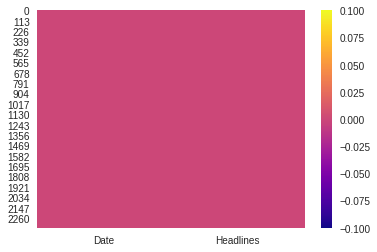

In [6]:
import seaborn as sns
sns.heatmap(fb_data.isnull(),cmap='plasma')

In [7]:
fb_data.sort_index(inplace=True)

In [8]:
df = pd.read_csv("HistoricalData_FB.csv", parse_dates=['Date'])
df.head()

,Date,Close/Last,Volume,Open,High,Low
0,2021-06-09,$330.25,13727950,$335.74,$336.8,$330
1,2021-06-08,$333.68,14580460,$336.7,$338.2999,$332.24
2,2021-06-07,$336.58,20136710,$329.48,$337.69,$328.93
3,2021-06-04,$330.35,13289380,$325.9,$332.455,$325.18
4,2021-06-03,$326.04,12610790,$325.78,$327.375,$323.48


In [9]:
df.rename(columns={"Close/Last":"Close"},inplace = True)



In [10]:
df.sort_values('Date', inplace=True)

In [11]:
df.reset_index()

,index,Date,Close,Volume,Open,High,Low
0,2278,2012-05-18,$38.2318,579377500,$42,$45,$38
1,2277,2012-05-21,$34.03,167943600,$36.53,$36.66,$33
2,2276,2012-05-22,$31,101667700,$32.61,$33.59,$30.94
3,2275,2012-05-23,$32,73541150,$31.37,$32.5,$31.36
4,2274,2012-05-24,$33.03,50208760,$32.95,$33.21,$31.77
...,...,...,...,...,...,...,...
2274,4,2021-06-03,$326.04,12610790,$325.78,$327.375,$323.48
2275,3,2021-06-04,$330.35,13289380,$325.9,$332.455,$325.18
2276,2,2021-06-07,$336.58,20136710,$329.48,$337.69,$328.93
2277,1,2021-06-08,$333.68,14580460,$336.7,$338.2999,$332.24


In [12]:
df.columns

Index(['Date', 'Close', 'Volume', 'Open', 'High', 'Low'], dtype='object')

In [13]:
data = pd.merge(fb_data, df, how='inner', on=['Date'])

In [14]:
data

,Date,Headlines,Close,Volume,Open,High,Low
0,2015-04-01,"Donald Yacktman on the Sources of Moats, His C...",$81.665,22028080,$82.5,$82.72,$80.87
1,2015-05-01,"SIM-free iPhone 6, 6 Plus reportedly debuting ...",$78.99,22811310,$79.24,$79.76,$78.11
2,2015-06-01,"Technology Transforming Cars Into ""Phones On W...",$80.29,18106110,$79.3,$80.38,$78.66
3,2015-07-01,Apple issues fourth developer beta of OS X 10....,$86.91,25198260,$86.77,$87.95,$86.49
4,2015-09-01,Samsung is reportedly making a secret new chip...,$87.23,35958020,$86.85,$89.39,$86.5
...,...,...,...,...,...,...,...
1590,2021-05-27,&quot;Friends: The Reunion&quot;: The Best Non...,$332.75,20477730,$328,$333.78,$326.76
1591,2021-05-28,Apple pushes back launch of podcast subscripti...,$328.73,12037430,$331,$332.8684,$328.33
1592,2021-01-06,Judge dismisses charges against Apple security...,$263.31,24354150,$262,$267.75,$260.01
1593,2021-04-06,"Global equities nearly grasp all-time record, ...",$306.26,17335250,$308.837,$311.35,$305.25


In [15]:
data["Close"] = data["Close"].str.replace('$', '').astype(float)
data["Open"] = data["Open"].str.replace('$', '').astype(float)
data["High"] = data["High"].str.replace('$', '').astype(float)
data["Low"] = data["Low"].str.replace('$', '').astype(float)

In [16]:
data.head()

,Date,Headlines,Close,Volume,Open,High,Low
0,2015-04-01,"Donald Yacktman on the Sources of Moats, His C...",81.665,22028080,82.50,82.72,80.87
1,2015-05-01,"SIM-free iPhone 6, 6 Plus reportedly debuting ...",78.990,22811310,79.24,79.76,78.11
2,2015-06-01,"Technology Transforming Cars Into ""Phones On W...",80.290,18106110,79.30,80.38,78.66
3,2015-07-01,Apple issues fourth developer beta of OS X 10....,86.910,25198260,86.77,87.95,86.49
4,2015-09-01,Samsung is reportedly making a secret new chip...,87.230,35958020,86.85,89.39,86.50


In [17]:
data.reset_index(inplace=True)
data_1=data[["Date","Close"]]

In [18]:
data_1=data[["Date","Close"]]

In [19]:
data_1=data_1.rename(columns={"Date": "ds", "Close": "y"})

In [20]:
data_1.head()

,ds,y
0,2015-04-01,81.665
1,2015-05-01,78.990
2,2015-06-01,80.290
3,2015-07-01,86.910
4,2015-09-01,87.230


**Prophet model**:Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data.

In [21]:
from fbprophet import Prophet
m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(data_1) 

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


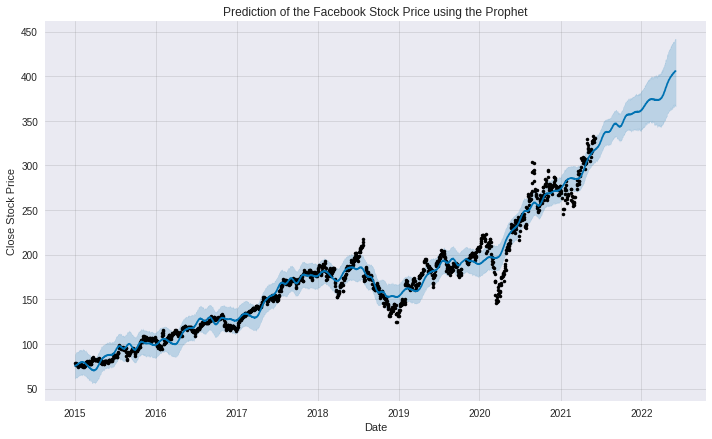

In [22]:
future = m.make_future_dataframe(periods=365) #we need to specify the number of days in future
prediction = m.predict(future)
m.plot(prediction)
plt.title("Prediction of the Facebook Stock Price using the Prophet")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()

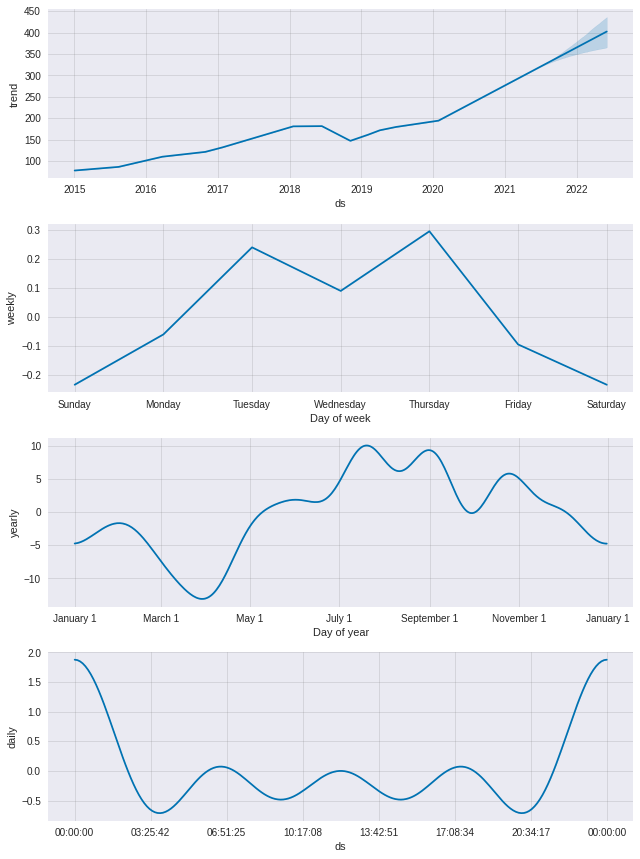

In [23]:
m.plot_components(prediction)
plt.show()

In [24]:
data.set_index("Date", inplace = True)
data.head()

,index,Headlines,Close,Volume,Open,High,Low
Date,,,,,,,
2015-04-01,0,"Donald Yacktman on the Sources of Moats, His C...",81.665,22028080,82.50,82.72,80.87
2015-05-01,1,"SIM-free iPhone 6, 6 Plus reportedly debuting ...",78.990,22811310,79.24,79.76,78.11
2015-06-01,2,"Technology Transforming Cars Into ""Phones On W...",80.290,18106110,79.30,80.38,78.66
2015-07-01,3,Apple issues fourth developer beta of OS X 10....,86.910,25198260,86.77,87.95,86.49
2015-09-01,4,Samsung is reportedly making a secret new chip...,87.230,35958020,86.85,89.39,86.50


In [25]:
data.sort_index(ascending=True,inplace=True)
data.head()

,index,Headlines,Close,Volume,Open,High,Low
Date,,,,,,,
2015-01-02,20,"Apple Loop: iOS 8.1.3 Angers Users, Outlook Ar...",78.450,18141830,78.58,78.9300,77.700
2015-01-05,82,"Apple Watch interest described as &quot;tepid,...",77.190,26392340,77.98,79.2455,76.860
2015-01-06,102,Apple&quot;s TV Service Delayed: Getting Local...,76.150,27365180,77.23,77.5900,75.365
2015-01-07,123,Apple Inc. leaks new iPod colors in iTunes 12....,76.150,22015250,76.76,77.3600,75.820
2015-01-08,145,Nomura Begins Coverage on Apple (AAPL) IBM cou...,78.175,23931830,76.74,78.2300,76.080


In [26]:
data.shape

(1595, 7)

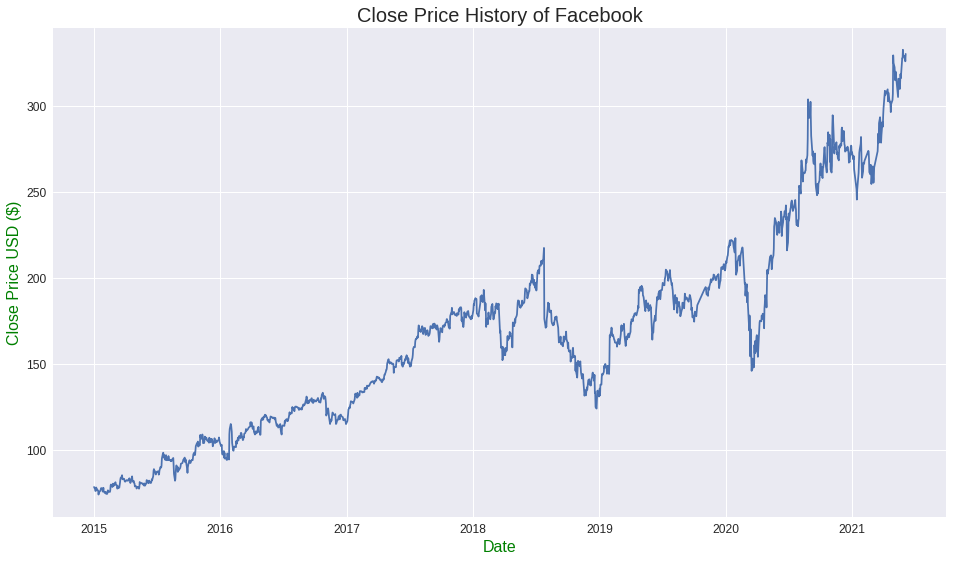

In [27]:
plt.figure(figsize=(16,9))
plt.title('Close Price History of Facebook', fontsize = 20)
plt.plot(data['Close'])
plt.xlabel('Date', fontsize = 16, color = 'g')
plt.ylabel('Close Price USD ($)', fontsize = 16, color = 'g')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

In [28]:
import os

In [29]:
data.to_csv('NewsandHistoricaldata.csv')

In [30]:
data['compound'] = ''
data['negative'] = ''
data['neutral'] = ''
data['positive'] = ''
data.head()

,index,Headlines,Close,Volume,Open,High,Low,compound,negative,neutral,positive
Date,,,,,,,,,,,
2015-01-02,20,"Apple Loop: iOS 8.1.3 Angers Users, Outlook Ar...",78.450,18141830,78.58,78.9300,77.700,,,,
2015-01-05,82,"Apple Watch interest described as &quot;tepid,...",77.190,26392340,77.98,79.2455,76.860,,,,
2015-01-06,102,Apple&quot;s TV Service Delayed: Getting Local...,76.150,27365180,77.23,77.5900,75.365,,,,
2015-01-07,123,Apple Inc. leaks new iPod colors in iTunes 12....,76.150,22015250,76.76,77.3600,75.820,,,,
2015-01-08,145,Nomura Begins Coverage on Apple (AAPL) IBM cou...,78.175,23931830,76.74,78.2300,76.080,,,,


In [31]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [32]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata

In [33]:
sid = SentimentIntensityAnalyzer()

data['compound'] = data['Headlines'].apply(lambda x: sid.polarity_scores(x)['compound'])
data['negative'] = data['Headlines'].apply(lambda x: sid.polarity_scores(x)['neg'])
data['neutral'] = data['Headlines'].apply(lambda x: sid.polarity_scores(x)['neu'])
data['positive'] = data['Headlines'].apply(lambda x: sid.polarity_scores(x)['pos'])

In [35]:
from textblob import TextBlob

In [36]:
def getsubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getpolarity(text):
    return TextBlob(text).sentiment.polarity

data['Subjectivity']=data['Headlines'].apply(getsubjectivity)
data['Polarity']=data['Headlines'].apply(getpolarity)
data

,index,Headlines,Close,Volume,Open,High,Low,compound,negative,neutral,positive,Subjectivity,Polarity
Date,,,,,,,,,,,,,
2015-01-02,20,"Apple Loop: iOS 8.1.3 Angers Users, Outlook Ar...",78.450,18141830,78.58,78.9300,77.7000,0.1943,0.116,0.749,0.135,0.789286,0.364286
2015-01-05,82,"Apple Watch interest described as &quot;tepid,...",77.190,26392340,77.98,79.2455,76.8600,0.9748,0.061,0.831,0.107,0.432742,0.121804
2015-01-06,102,Apple&quot;s TV Service Delayed: Getting Local...,76.150,27365180,77.23,77.5900,75.3650,0.9932,0.034,0.862,0.105,0.323315,0.163185
2015-01-07,123,Apple Inc. leaks new iPod colors in iTunes 12....,76.150,22015250,76.76,77.3600,75.8200,0.9866,0.059,0.812,0.129,0.399957,0.173163
2015-01-08,145,Nomura Begins Coverage on Apple (AAPL) IBM cou...,78.175,23931830,76.74,78.2300,76.0800,0.4939,0.059,0.827,0.114,0.404167,0.170833
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-28,1591,Apple pushes back launch of podcast subscripti...,328.730,12037430,331.00,332.8684,328.3300,0.9937,0.049,0.845,0.105,0.378480,0.214482
2021-06-01,1514,"TSX nears record high as cannabis, renewables ...",329.130,11765910,330.15,331.4200,326.6400,0.9976,0.046,0.836,0.118,0.400223,0.152232
2021-06-02,1529,Exclusive Social Media App Clubhouse Rises In ...,329.150,11654280,330.38,331.8700,327.1215,0.7719,0.070,0.835,0.095,0.329710,0.144451


In [37]:
data.head()


,index,Headlines,Close,Volume,Open,High,Low,compound,negative,neutral,positive,Subjectivity,Polarity
Date,,,,,,,,,,,,,
2015-01-02,20,"Apple Loop: iOS 8.1.3 Angers Users, Outlook Ar...",78.450,18141830,78.58,78.9300,77.700,0.1943,0.116,0.749,0.135,0.789286,0.364286
2015-01-05,82,"Apple Watch interest described as &quot;tepid,...",77.190,26392340,77.98,79.2455,76.860,0.9748,0.061,0.831,0.107,0.432742,0.121804
2015-01-06,102,Apple&quot;s TV Service Delayed: Getting Local...,76.150,27365180,77.23,77.5900,75.365,0.9932,0.034,0.862,0.105,0.323315,0.163185
2015-01-07,123,Apple Inc. leaks new iPod colors in iTunes 12....,76.150,22015250,76.76,77.3600,75.820,0.9866,0.059,0.812,0.129,0.399957,0.173163
2015-01-08,145,Nomura Begins Coverage on Apple (AAPL) IBM cou...,78.175,23931830,76.74,78.2300,76.080,0.4939,0.059,0.827,0.114,0.404167,0.170833


In [38]:
data.columns

Index(['index', 'Headlines', 'Close', 'Volume', 'Open', 'High', 'Low',
       'compound', 'negative', 'neutral', 'positive', 'Subjectivity',
       'Polarity'],
      dtype='object')

In [39]:
data = data[['Close', 'compound', 'negative', 'neutral', 'positive', 'Open', 'High', 'Low', 'Volume','Subjectivity','Polarity']]

data.head()

,Close,compound,negative,neutral,positive,Open,High,Low,Volume,Subjectivity,Polarity
Date,,,,,,,,,,,
2015-01-02,78.450,0.1943,0.116,0.749,0.135,78.58,78.9300,77.700,18141830,0.789286,0.364286
2015-01-05,77.190,0.9748,0.061,0.831,0.107,77.98,79.2455,76.860,26392340,0.432742,0.121804
2015-01-06,76.150,0.9932,0.034,0.862,0.105,77.23,77.5900,75.365,27365180,0.323315,0.163185
2015-01-07,76.150,0.9866,0.059,0.812,0.129,76.76,77.3600,75.820,22015250,0.399957,0.173163
2015-01-08,78.175,0.4939,0.059,0.827,0.114,76.74,78.2300,76.080,23931830,0.404167,0.170833


In [40]:
stockdata=data.to_csv('stockdata.csv')

In [41]:
stockdata = pd.read_csv('stockdata.csv', index_col = False)

stockdata.rename(columns={'Unnamed: 0':'Date'}, inplace = True)

stockdata.set_index('Date', inplace=True)

stockdata.head()

,Close,compound,negative,neutral,positive,Open,High,Low,Volume,Subjectivity,Polarity
Date,,,,,,,,,,,
2015-01-02,78.450,0.1943,0.116,0.749,0.135,78.58,78.9300,77.700,18141830,0.789286,0.364286
2015-01-05,77.190,0.9748,0.061,0.831,0.107,77.98,79.2455,76.860,26392340,0.432742,0.121804
2015-01-06,76.150,0.9932,0.034,0.862,0.105,77.23,77.5900,75.365,27365180,0.323315,0.163185
2015-01-07,76.150,0.9866,0.059,0.812,0.129,76.76,77.3600,75.820,22015250,0.399957,0.173163
2015-01-08,78.175,0.4939,0.059,0.827,0.114,76.74,78.2300,76.080,23931830,0.404167,0.170833


In [42]:
stockdata.isna().any()

Close           False
compound        False
negative        False
neutral         False
positive        False
Open            False
High            False
Low             False
Volume          False
Subjectivity    False
Polarity        False
dtype: bool

In [43]:
stockdata.describe(include='all')

,Close,compound,negative,neutral,positive,Open,High,Low,Volume,Subjectivity,Polarity
count,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1.595000e+03,1595.000000,1595.000000
mean,165.369643,0.684809,0.056437,0.841263,0.102310,165.288320,167.188786,163.395256,2.231716e+07,0.416003,0.130218
std,58.164559,0.613134,0.029990,0.039018,0.031891,58.110148,58.991088,57.326541,1.311689e+07,0.078924,0.074241
min,74.050000,-0.999500,0.000000,0.666000,0.000000,74.040000,74.830000,72.000000,5.913066e+06,0.000000,-0.232576
25%,118.920000,0.837450,0.037000,0.819000,0.081000,118.947500,119.648500,117.790000,1.455378e+07,0.376172,0.087853
50%,165.790000,0.978400,0.052000,0.845000,0.101000,165.440000,167.450000,163.730000,1.898374e+07,0.420321,0.130476
75%,193.150000,0.993900,0.070000,0.867000,0.121000,193.032500,195.170000,191.460000,2.536836e+07,0.459573,0.173140
max,332.750000,0.999600,0.241000,1.000000,0.242000,331.000000,333.780000,328.330000,1.690599e+08,1.000000,0.533333


In [44]:
stockdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1595 entries, 2015-01-02 to 2021-06-04
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Close         1595 non-null   float64
 1   compound      1595 non-null   float64
 2   negative      1595 non-null   float64
 3   neutral       1595 non-null   float64
 4   positive      1595 non-null   float64
 5   Open          1595 non-null   float64
 6   High          1595 non-null   float64
 7   Low           1595 non-null   float64
 8   Volume        1595 non-null   int64  
 9   Subjectivity  1595 non-null   float64
 10  Polarity      1595 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 149.5+ KB


In [45]:
X=stockdata[['Open','High','Low','Volume','positive','neutral','positive','compound','Subjectivity','Polarity']]
Y=stockdata['Close']

In [46]:
print(X)

              Open      High       Low  ...  compound  Subjectivity  Polarity
Date                                    ...                                  
2015-01-02   78.58   78.9300   77.7000  ...    0.1943      0.789286  0.364286
2015-01-05   77.98   79.2455   76.8600  ...    0.9748      0.432742  0.121804
2015-01-06   77.23   77.5900   75.3650  ...    0.9932      0.323315  0.163185
2015-01-07   76.76   77.3600   75.8200  ...    0.9866      0.399957  0.173163
2015-01-08   76.74   78.2300   76.0800  ...    0.4939      0.404167  0.170833
...            ...       ...       ...  ...       ...           ...       ...
2021-05-28  331.00  332.8684  328.3300  ...    0.9937      0.378480  0.214482
2021-06-01  330.15  331.4200  326.6400  ...    0.9976      0.400223  0.152232
2021-06-02  330.38  331.8700  327.1215  ...    0.7719      0.329710  0.144451
2021-06-03  325.78  327.3750  323.4800  ...   -0.3348      0.445871  0.060720
2021-06-04  325.90  332.4550  325.1800  ...    0.9801      0.436

In [47]:
Y

Date
2015-01-02     78.450
2015-01-05     77.190
2015-01-06     76.150
2015-01-07     76.150
2015-01-08     78.175
               ...   
2021-05-28    328.730
2021-06-01    329.130
2021-06-02    329.150
2021-06-03    326.040
2021-06-04    330.350
Name: Close, Length: 1595, dtype: float64

**Training the Algorithm**
Linear Regression Model:Linear regression performs the task to predict a dependent variable value (y) based on a given independent variable (x). So, this regression technique finds out a linear relationship between x (input) and y(output).

Making the Linear Regression Algorithm

In [48]:
from sklearn import metrics
import seaborn as sns

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test =train_test_split(X, Y, test_size =
0.25, random_state = 0)

In [50]:
print(X_test)

              Open      High       Low  ...  compound  Subjectivity  Polarity
Date                                    ...                                  
2018-08-15  179.34  180.8700  174.7800  ...   -0.1531      0.319971  0.087520
2019-02-05  169.15  171.9800  168.6900  ...    0.9850      0.449656  0.020633
2019-06-06  168.30  169.7000  167.2300  ...   -0.9596      0.376776  0.088746
2016-12-07  117.00  117.9500  116.5700  ...    0.9840      0.257620  0.136173
2019-06-21  188.75  192.0000  188.7500  ...    0.7394      0.351285  0.241930
...            ...       ...       ...  ...       ...           ...       ...
2019-09-03  184.00  185.6700  182.1100  ...    0.9169      0.295833  0.062500
2016-12-09  119.22  119.9400  118.9500  ...    0.9547      0.434074  0.116953
2016-06-10  117.54  118.1100  116.2600  ...    0.9886      0.443321  0.050987
2017-02-03  131.24  132.8500  130.7600  ...    0.9833      0.536780  0.265709
2016-10-04  129.17  129.2765  127.5499  ...    0.6580      0.000

In [51]:
X_train.shape

(1196, 10)

In [52]:
X_test.shape

(399, 10)

**Making the Linear Regression Algorithm**

In [53]:
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
Y_pred=regressor.predict(X_test)

In [55]:

Y_pred.shape

(399,)

In [56]:
Y_test.shape

(399,)

**Evaluating the data**
The final step is to evaluate the performance of the model. This step is important to compare how well both the algorithms perform on a specified dataset.

In [57]:
regressor.score(X_test,Y_test)

0.9994791177844797

In [58]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test,Y_pred))


Mean Absolute Error: 0.8727556497481197


In [59]:
print('Mean squared Error:', metrics.mean_squared_error(Y_test,Y_pred))

Mean squared Error: 1.7714067173884818


In [60]:
print('Root Mean Squared Error:', math.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))

Root Mean Squared Error: 1.3309420413333113


In [61]:
dframe=pd.DataFrame({'Actual price':Y_test,'Predicted price':Y_pred})

In [62]:
# Comparing Actual vs Predicted
print(dframe)

            Actual price  Predicted price
Date                                     
2018-08-15        179.53       177.201341
2019-02-05        171.16       170.836618
2019-06-06        168.33       168.718140
2016-12-07        117.95       117.585246
2019-06-21        191.14       191.368900
...                  ...              ...
2019-09-03        182.39       183.855193
2016-12-09        119.68       119.612458
2016-06-10        116.62       117.013554
2017-02-03        130.98       132.261323
2016-10-04        128.19       128.225409

[399 rows x 2 columns]


**Plotting the Result**

In [63]:
#plotting the grid to depict the actual and predicted value
graph=dframe.head(20)

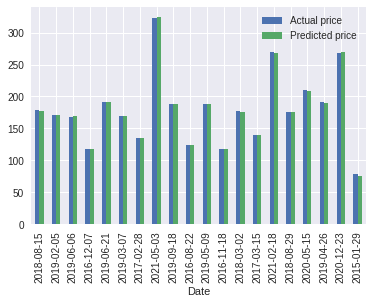

In [65]:
graph.plot(kind='bar')

In [66]:
import pickle
pickle_out=open("fb_LRModel.pkl","wb")
pickle.dump(regressor,pickle_out)
pickle_out.close()

In [67]:

files.download('fb_LRModel.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>